In [2]:
import pandas as pd
import torch
from PIL import Image, ImageDraw
import os
import xml.etree.ElementTree as ET
import torchvision

# CHECK IF CUDA IS AVAIABLE

In [ ]:
torch.cuda.is_available()

In [ ]:
image = Image.open("data/videos/aus_margaret/FerreiraIbelli/train/scene01191.png")
image

In [3]:
tree = ET.parse("data/videos/aus_margaret/FerreiraIbelli/train/scene01191.xml")

In [4]:
root = tree.getroot()

In [ ]:
for elem in tree.iter():
            if elem.tag == 'path':
                print(elem.tag, elem.text)
            elif elem.tag == 'width':
                print(elem.tag, elem.text)
            elif elem.tag == 'height':
                print(elem.tag, elem.text)
            elif elem.tag == 'name':
                print(elem.tag, elem.text)
            elif elem.tag == 'xmin':
                print(elem.tag, elem.text)
            elif elem.tag == 'ymin':
                print(elem.tag, elem.text)
            elif elem.tag == 'xmax':
                print(elem.tag, elem.text)
            elif elem.tag == 'ymax':
                print(elem.tag, elem.text)

In [ ]:
xmin = int(root[6][4][0].text)
ymin = int(root[6][4][1].text)
xmax = int(root[6][4][2].text)
ymax = int(root[6][4][3].text)
draw = ImageDraw.Draw(image)
draw.rectangle([(xmin, ymin), (xmax, ymax)], outline ="red")
image

In [5]:
path=[]
withh=[]
height=[]
name=[]
xmin=[]
ymin=[]
xmax=[]
ymax=[]

In [7]:
for file in os.listdir("data/videos/aus_margaret/FerreiraIbelli/train/"):
    if file.endswith(".xml"):
        tree = ET.parse("data/videos/aus_margaret/FerreiraIbelli/train/"+file)
        for elem in tree.iter():
            if elem.tag == 'name':
                name.append(elem.text)
            elif elem.tag == 'xmin':
                xmin.append(elem.text)
            elif elem.tag == 'ymin':
                ymin.append(elem.text)
            elif elem.tag == 'xmax':
                xmax.append(elem.text)
            elif elem.tag == 'ymax':
                ymax.append(elem.text)

In [8]:
df = pd.DataFrame()

In [9]:
df['xmin'] = xmin
df['ymin'] = ymin
df['xmax'] = xmax
df['ymax'] = ymax

In [10]:
df

,xmin,ymin,xmax,ymax
0,594,304,734,369
1,568,338,923,420
2,684,347,795,454
3,578,433,630,470
4,893,405,974,454
...,...,...,...,...
118,582,309,788,481
119,775,229,834,345
120,636,293,814,470
121,795,454,912,576


In [11]:
df = df.apply(pd.to_numeric)

In [12]:
df.dtypes

xmin    int64
ymin    int64
xmax    int64
ymax    int64
dtype: object

In [13]:
df.describe(include = 'all')

,xmin,ymin,xmax,ymax
count,123.000000,123.000000,123.000000,123.000000
mean,644.325203,307.894309,800.951220,446.747967
std,155.376038,87.520285,144.248752,88.413391
min,58.000000,117.000000,155.000000,243.000000
25%,570.500000,256.000000,734.000000,378.500000
50%,666.000000,310.000000,822.000000,462.000000
75%,745.000000,361.000000,890.500000,505.000000
max,943.000000,498.000000,1082.000000,664.000000


In [14]:
coordinates = []
coordinate = []
for index, row in df.iterrows():
    coordinate.append('xmin')
    coordinates.append(row['xmin'])
    coordinate.append('ymin')
    coordinates.append(row['ymin'])
    coordinate.append('xmax')
    coordinates.append(row['xmax'])
    coordinate.append('ymax')
    coordinates.append(row['ymax'])

In [15]:
coordinates

[594,
 304,
 734,
 369,
 568,
 338,
 923,
 420,
 684,
 347,
 795,
 454,
 578,
 433,
 630,
 470,
 893,
 405,
 974,
 454,
 745,
 402,
 823,
 468,
 943,
 286,
 1058,
 380,
 575,
 398,
 648,
 476,
 699,
 125,
 886,
 418,
 376,
 294,
 775,
 409,
 634,
 361,
 819,
 453,
 768,
 339,
 889,
 465,
 654,
 268,
 756,
 381,
 523,
 348,
 912,
 664,
 882,
 310,
 948,
 403,
 698,
 400,
 764,
 442,
 744,
 411,
 876,
 611,
 677,
 447,
 812,
 594,
 759,
 345,
 851,
 408,
 518,
 374,
 720,
 571,
 550,
 293,
 874,
 377,
 744,
 248,
 832,
 323,
 779,
 417,
 897,
 555,
 802,
 257,
 933,
 418,
 545,
 335,
 702,
 486,
 534,
 176,
 608,
 259,
 698,
 299,
 734,
 346,
 480,
 288,
 674,
 499,
 578,
 353,
 793,
 542,
 459,
 391,
 668,
 512,
 634,
 315,
 721,
 384,
 702,
 319,
 766,
 415,
 516,
 126,
 874,
 335,
 658,
 146,
 942,
 410,
 619,
 303,
 812,
 553,
 784,
 475,
 896,
 586,
 685,
 347,
 899,
 532,
 535,
 117,
 830,
 287,
 695,
 378,
 837,
 470,
 706,
 361,
 809,
 537,
 687,
 325,
 851,
 415,
 789,
 227,
 84

In [16]:
coordinate

['xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'xmin',
 'ymin',
 'xmax',
 

In [17]:
data={'cartesian':coordinate,
      'coordinates':coordinates}

In [18]:
df_plot = pd.DataFrame(data = data);

In [19]:
df_plot

,cartesian,coordinates
0,xmin,594
1,ymin,304
2,xmax,734
3,ymax,369
4,xmin,568
...,...,...
487,ymax,576
488,xmin,652
489,ymin,306
490,xmax,749


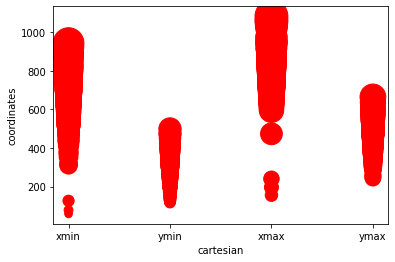

In [20]:
df_plot.plot.scatter(x = 'cartesian', y = 'coordinates', s = 'coordinates', c = 'red');